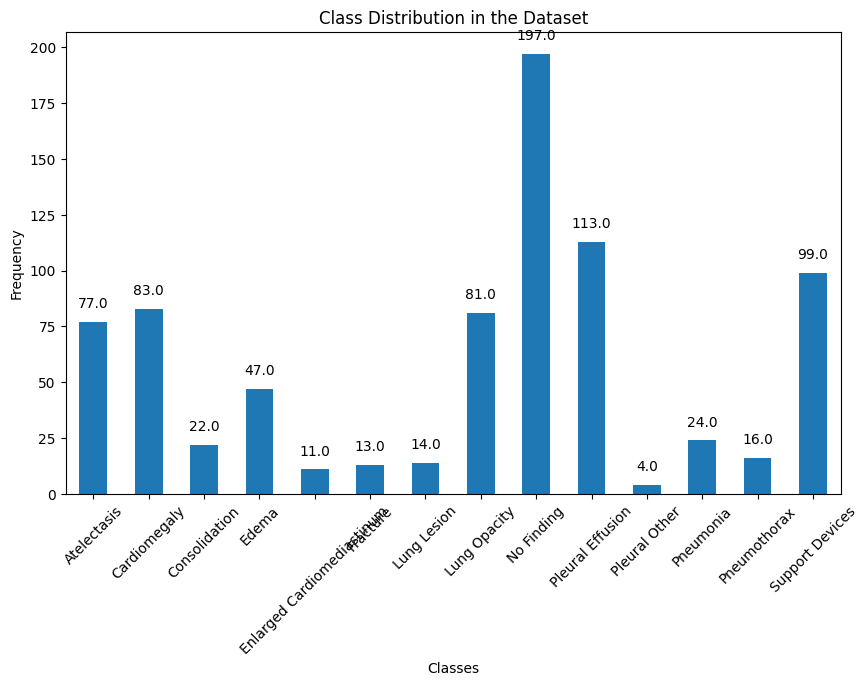

Class frequencies in numbers along with disease names:
Atelectasis: 77.0
Cardiomegaly: 83.0
Consolidation: 22.0
Edema: 47.0
Enlarged Cardiomediastinum: 11.0
Fracture: 13.0
Lung Lesion: 14.0
Lung Opacity: 81.0
No Finding: 197.0
Pleural Effusion: 113.0
Pleural Other: 4.0
Pneumonia: 24.0
Pneumothorax: 16.0
Support Devices: 99.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/500.csv')

labels = data[[
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]].to_numpy()

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

# Handle missing values
data[target_columns] = data[target_columns].fillna(0)
data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)

# Calculate class frequencies
class_frequencies = data[target_columns].sum()

plt.figure(figsize=(10, 6))
bars = class_frequencies.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.show()

class_frequencies_dict = class_frequencies.to_dict()
print("Class frequencies in numbers along with disease names:")
for disease, freq in class_frequencies_dict.items():
    print(f"{disease}: {freq}")


In [ ]:
pip install -U imbalanced-learn


In [ ]:
import pandas as pd
from sklearn.utils import resample

data = pd.read_csv('/content/drive/MyDrive/cleaned_fileforread10000.csv')
target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

max_count = int(data[target_columns].sum().max())

balanced_data = pd.DataFrame()

for column in target_columns:
    positive_samples = data[data[column] == 1]
    negative_samples = data[data[column] == 0]

    positive_upsampled = resample(positive_samples,
                                  replace=True,
                                  n_samples=max_count,
                                  random_state=42)

    upsampled_data = pd.concat([positive_upsampled, negative_samples])

    balanced_data = pd.concat([balanced_data, upsampled_data])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the new class distribution
print("Balanced class frequencies (upsampling):", balanced_data[target_columns].sum())


Balanced class frequencies (upsampling): Atelectasis                   13540.0
Cardiomegaly                  14040.0
Consolidation                  6110.0
Edema                          6693.0
Enlarged Cardiomediastinum     2694.0
Fracture                       5249.0
Lung Lesion                    5582.0
Lung Opacity                  18779.0
No Finding                     5950.0
Pleural Effusion              18761.0
Pleural Other                  4470.0
Pneumonia                      2439.0
Pneumothorax                   5917.0
Support Devices               21603.0
dtype: float64


In [ ]:
import pandas as pd
from sklearn.utils import resample

data = pd.read_csv('/content/drive/MyDrive/cleaned_fileforread10000.csv')
labels = data[[
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]].to_numpy()
target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

balanced_data =data

median_frequency = int(data[target_columns].sum().median())

for column in target_columns:
    class_samples = data[data[column] == 1]
    class_count = class_samples.shape[0]

    if class_count == 0:
        print(f"Skipping {column} due to lack of samples.")
        continue

    resampled = resample(class_samples,
                         replace=True,  # Sample with replacement
                         n_samples=median_frequency,  # Match median frequency
                         random_state=42)

    balanced_data = pd.concat([balanced_data, resampled])

balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

class_frequencies_balanced = balanced_data[target_columns].sum()
print("Balanced class frequencies:", class_frequencies_balanced)


Balanced class frequencies: Atelectasis                   2825.0
Cardiomegaly                  3012.0
Consolidation                  900.0
Edema                         1158.0
Enlarged Cardiomediastinum     222.0
Fracture                       784.0
Lung Lesion                    850.0
Lung Opacity                  3907.0
No Finding                    4171.0
Pleural Effusion              3938.0
Pleural Other                  619.0
Pneumonia                      140.0
Pneumothorax                  1059.0
Support Devices               4548.0
dtype: float64


Training on Fold: 1
Found 8752 validated image filenames.
Found 1246 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20
274/274 [==============================] - 1890s 7s/step - loss: 0.3013 - precision_7: 0.5585 - recall_7: 0.2002 - f1_score: 0.2923 - accuracy: 0.3204 - val_loss: 0.2728 - val_precision_7: 0.6821 - val_recall_7: 0.2398 - val_f1_score: 0.3548 - val_accuracy: 0.3427 - lr: 5.0000e-05
Epoch 2/20
274/274 [==============================] - 285s 1s/step - loss: 0.2729 - precision_7: 0.6402 - recall_7: 0.2835 - f1_score: 0.3905 - accuracy: 0.3517 - val_loss: 0.2689 - val_precision_7: 0.6854 - val_recall_7: 0.2607 - val_f1_score: 0.3784 - val_accuracy: 0.3443 - lr: 5.0000e-05
Epoch 3/20
274/274 [==============================] - 297s 1s/step - loss: 0.2520 - precision_7: 0.6778 - recall_7: 0.3451 - f1_score: 0.4556 - accuracy: 0.3831 - val_loss: 0.2663 - val_precision_7: 0.6367 - val_recall_7: 0.3349 - val_f1_score: 0.4387 - val_accuracy: 0.3620 - lr: 5.0000e-05
Epoch 4/20
274/274 [==============================] - 340s 1s/step - loss: 0.2249 - precision_7: 0.7250 - recall_7: 0.4328 

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1251 validated image filenames.
Epoch 1/20
274/274 [==============================] - 277s 1s/step - loss: 0.0913 - precision_7: 0.9256 - recall_7: 0.8595 - f1_score: 0.8903 - accuracy: 0.6214 - val_loss: 0.0313 - val_precision_7: 0.9952 - val_recall_7: 0.9769 - val_f1_score: 0.9864 - val_accuracy: 0.6851 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 267s 973ms/step - loss: 0.0714 - precision_7: 0.9437 - recall_7: 0.8882 - f1_score: 0.9142 - accuracy: 0.6359 - val_loss: 0.0300 - val_precision_7: 0.9942 - val_recall_7: 0.9740 - val_f1_score: 0.9838 - val_accuracy: 0.6819 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 284s 1s/step - loss: 0.0587 - precision_7: 0.9572 - recall_7: 0.9041 - f1_score: 0.9291 - accuracy: 0.6491 - val_loss: 0.0267 - val_precision_7: 0.9942 - val_recall_7: 0.9745 - val_f1_score: 0.9847 - val_accuracy: 0.6914 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 278s 1s/step - loss: 0.0480 -

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1248 validated image filenames.
Epoch 1/20
274/274 [==============================] - 282s 1s/step - loss: 0.0197 - precision_7: 0.9843 - recall_7: 0.9726 - f1_score: 0.9783 - accuracy: 0.6763 - val_loss: 0.0053 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6883 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 279s 1s/step - loss: 0.0153 - precision_7: 0.9901 - recall_7: 0.9815 - f1_score: 0.9855 - accuracy: 0.6762 - val_loss: 0.0052 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6867 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 278s 1s/step - loss: 0.0135 - precision_7: 0.9914 - recall_7: 0.9848 - f1_score: 0.9879 - accuracy: 0.6741 - val_loss: 0.0051 - val_precision_7: 0.9995 - val_recall_7: 0.9991 - val_f1_score: 0.9993 - val_accuracy: 0.6867 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 280s 1s/step - loss: 0.0118 - pr

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1251 validated image filenames.
Epoch 1/20
274/274 [==============================] - 272s 993ms/step - loss: 0.0093 - precision_7: 0.9944 - recall_7: 0.9895 - f1_score: 0.9920 - accuracy: 0.6785 - val_loss: 0.0020 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6827 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 269s 980ms/step - loss: 0.0081 - precision_7: 0.9954 - recall_7: 0.9922 - f1_score: 0.9939 - accuracy: 0.6755 - val_loss: 0.0020 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6906 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 282s 1s/step - loss: 0.0073 - precision_7: 0.9966 - recall_7: 0.9931 - f1_score: 0.9948 - accuracy: 0.6754 - val_loss: 0.0022 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.7090 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 268s 977ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1248 validated image filenames.
Epoch 1/20
274/274 [==============================] - 262s 955ms/step - loss: 0.0063 - precision_7: 0.9959 - recall_7: 0.9941 - f1_score: 0.9949 - accuracy: 0.6912 - val_loss: 0.0011 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6963 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 262s 956ms/step - loss: 0.0053 - precision_7: 0.9967 - recall_7: 0.9953 - f1_score: 0.9959 - accuracy: 0.6822 - val_loss: 0.0011 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6611 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 267s 976ms/step - loss: 0.0056 - precision_7: 0.9963 - recall_7: 0.9955 - f1_score: 0.9959 - accuracy: 0.6761 - val_loss: 0.0012 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6619 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 259s 945ms/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1249 validated image filenames.
Epoch 1/20
274/274 [==============================] - 276s 1s/step - loss: 0.0048 - precision_7: 0.9967 - recall_7: 0.9954 - f1_score: 0.9961 - accuracy: 0.6858 - val_loss: 6.7137e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6725 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 258s 942ms/step - loss: 0.0046 - precision_7: 0.9971 - recall_7: 0.9956 - f1_score: 0.9964 - accuracy: 0.6889 - val_loss: 7.9409e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6597 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 271s 990ms/step - loss: 0.0041 - precision_7: 0.9975 - recall_7: 0.9956 - f1_score: 0.9965 - accuracy: 0.6857 - val_loss: 8.2145e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6821 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 280s 1s/step -

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1252 validated image filenames.
Epoch 1/20
274/274 [==============================] - 280s 1s/step - loss: 0.0035 - precision_7: 0.9979 - recall_7: 0.9969 - f1_score: 0.9974 - accuracy: 0.6873 - val_loss: 4.6357e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6502 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 270s 986ms/step - loss: 0.0037 - precision_7: 0.9971 - recall_7: 0.9967 - f1_score: 0.9970 - accuracy: 0.6836 - val_loss: 4.9734e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6677 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 264s 964ms/step - loss: 0.0032 - precision_7: 0.9985 - recall_7: 0.9971 - f1_score: 0.9978 - accuracy: 0.6913 - val_loss: 5.0590e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6629 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 260s 948ms/ste

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="drive_path". These filename(s) will be ignored.
  warnings.warn(


Found 1253 validated image filenames.
Epoch 1/20
274/274 [==============================] - 264s 964ms/step - loss: 0.0032 - precision_7: 0.9979 - recall_7: 0.9971 - f1_score: 0.9974 - accuracy: 0.6839 - val_loss: 3.9490e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6616 - lr: 1.0000e-05
Epoch 2/20
274/274 [==============================] - 260s 949ms/step - loss: 0.0032 - precision_7: 0.9973 - recall_7: 0.9973 - f1_score: 0.9973 - accuracy: 0.6842 - val_loss: 4.5023e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6688 - lr: 1.0000e-05
Epoch 3/20
274/274 [==============================] - 273s 994ms/step - loss: 0.0030 - precision_7: 0.9982 - recall_7: 0.9974 - f1_score: 0.9978 - accuracy: 0.6870 - val_loss: 3.7272e-04 - val_precision_7: 1.0000 - val_recall_7: 1.0000 - val_f1_score: 1.0000 - val_accuracy: 0.6760 - lr: 1.0000e-05
Epoch 4/20
274/274 [==============================] - 262s 958ms/

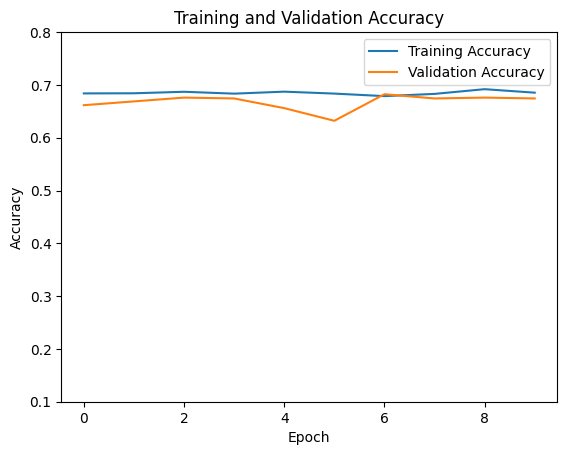

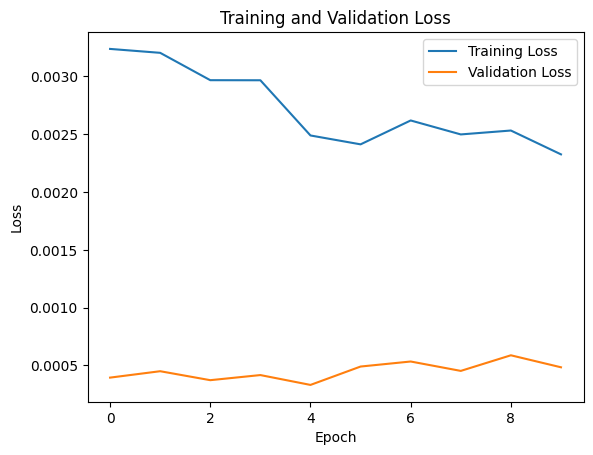

In [ ]:
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
!pip install scikit-multilearn
from skmultilearn.model_selection import IterativeStratification
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from sklearn.model_selection import train_test_split
# Define F1-score metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))
data = pd.read_csv('/content/drive/MyDrive/cleaned_fileforread10000.csv')
labels = data[[
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]].to_numpy()

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]
data['drive_path'] = data['drive_path'].astype(str)
data[target_columns] = data[target_columns].fillna(0)
data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)
def create_model():
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

    # Freeze all layers except the last few
    for layer in base_model.layers[:-5]:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(len(target_columns), activation='sigmoid')(x)  # Sigmoid activation for multi-label classification

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='binary_crossentropy',
                  metrics=[Precision(), Recall(), f1_score, 'accuracy'])  # Include F1-score metric

    return model

n_folds = 8
stratified_kf = IterativeStratification(n_splits=n_folds, order=1)

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255.)

# Initialize a list to store the history objects
all_histories = []

best_val_loss = float('inf')


model = create_model()

for i, (train, test) in enumerate(stratified_kf.split(data, labels)):
    print(f"Training on Fold: {i+1}")

    train_data = data.iloc[train]
    test_data = data.iloc[test]

    train_generator = datagen.flow_from_dataframe(train_data, x_col="drive_path", y_col=target_columns,
                                                  target_size=(299, 299), class_mode='raw', batch_size=32)
    test_generator = datagen.flow_from_dataframe(test_data, x_col="drive_path", y_col=target_columns,
                                                 target_size=(299, 299), class_mode='raw', batch_size=32)

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

    history = model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[early_stopping, reduce_lr])

    all_histories.append(history.history)

    current_val_loss = min(history.history['val_loss'])
    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss

        save_model(model, "/content/drive/MyDrive/best_model5000.h5")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks([i / 10 for i in range(1, 10)])  # Set custom y-axis ticks
plt.ylim(0.1, 0.8)  # Set y-axis limits
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import cv2
import pandas as pd

df = pd.read_csv('/content/500.csv')

df['image_array'] = None

for index, row in df.iterrows():
    image_path = row['drive_path']
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    image_resized = cv2.resize(image, (299, 299))  # Resize to 50x50 pixels

    image_flattened = image_resized.flatten().tolist()

    df.at[index, 'image_array'] = str(image_flattened)

df.drop(columns=['drive_path'], inplace=True)

df.to_csv('new_file.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast  # To convert string to list

df = pd.read_csv('new_file.csv')

for index, row in df.iterrows():
    image_array_str = row['image_array']
    image_array_list = ast.literal_eval(image_array_str)

    image_array = np.array(image_array_list, dtype=np.uint8).reshape(299, 299)

    labels = []
    for column in df.columns[:-1]:
        if row[column] == 1:
            labels.append(column)

    plt.imshow(image_array, cmap='gray')
    plt.title("Labels: " + ', '.join(labels))
    plt.axis('off')
    plt.show()


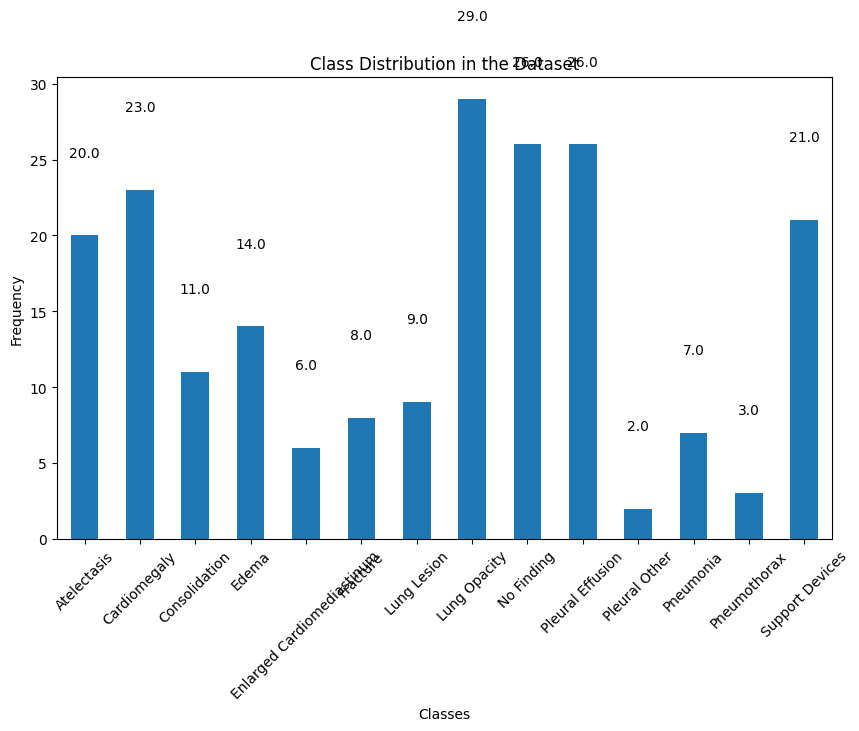

Class frequencies in numbers along with disease names:
Atelectasis: 20.0
Cardiomegaly: 23.0
Consolidation: 11.0
Edema: 14.0
Enlarged Cardiomediastinum: 6.0
Fracture: 8.0
Lung Lesion: 9.0
Lung Opacity: 29.0
No Finding: 26.0
Pleural Effusion: 26.0
Pleural Other: 2.0
Pneumonia: 7.0
Pneumothorax: 3.0
Support Devices: 21.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/140.csv')
labels = data[[
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]].to_numpy()

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

data[target_columns] = data[target_columns].fillna(0)
data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)

class_frequencies = data[target_columns].sum()

plt.figure(figsize=(10, 6))
bars = class_frequencies.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.show()

class_frequencies_dict = class_frequencies.to_dict()
print("Class frequencies in numbers along with disease names:")
for disease, freq in class_frequencies_dict.items():
    print(f"{disease}: {freq}")


In [ ]:
!pip install numpy pandas scikit-learn imbalanced-learn opencv-python


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import cv2

df = pd.read_csv('/content/drive/MyDrive/140.csv')

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]
df[target_columns] = df[target_columns].fillna(0)
df[target_columns] = df[target_columns].applymap(lambda x: 0 if x < 0 else x)

print("Original class distribution:")
print(df[target_columns].sum())

images = []
labels = []

for index, row in df.iterrows():
    img_path = row['drive_path']
    label = row[target_columns].to_numpy()
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_array = np.array(img)
    flattened_img_array = img_array.flatten()
    images.append(flattened_img_array)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

resampled_dfs = []
smote = SMOTE(sampling_strategy='auto', random_state=42)
for i, col in enumerate(target_columns):
    y_current = y_train[:, i].ravel().astype('int')  # Ensure 1-D array and correct dtype

    if np.sum(y_current) < 2:
        print(f"Skipping {col} due to insufficient samples.")
        continue

    k_neighbors = min(5, np.sum(y_current) - 1)
    smote.set_params(k_neighbors=k_neighbors)

    X_resampled, y_resampled = smote.fit_resample(X_train, y_current)

    # Create a DataFrame for the current resampled label and append to the list
    y_resampled_df = pd.DataFrame({col: y_resampled})
    resampled_dfs.append(y_resampled_df)

final_resampled_df = pd.concat(resampled_dfs, axis=1)

print("Resampled class distribution:")
print(final_resampled_df.sum())



Original class distribution:
Atelectasis                   192.0
Cardiomegaly                  165.0
Consolidation                  48.0
Edema                         107.0
Enlarged Cardiomediastinum     20.0
Fracture                       22.0
Lung Lesion                    17.0
Lung Opacity                  197.0
No Finding                    353.0
Pleural Effusion              248.0
Pleural Other                  10.0
Pneumonia                      62.0
Pneumothorax                   25.0
Support Devices               266.0
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import normalize
df = pd.read_csv('/content/drive/MyDrive/140.csv')

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

df[target_columns] = df[target_columns].fillna(0)
df[target_columns] = df[target_columns].applymap(lambda x: 0 if x < 0 else x)

print("Original class distribution:")
print(df[target_columns].sum())

images = []
labels = []

for index, row in df.iterrows():
    img_path = row['drive_path']
    label = row[target_columns].to_numpy()
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_array = np.array(img)
    flattened_img_array = img_array.flatten()
    images.append(flattened_img_array)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

resampled_dfs = []
smote = SMOTE(sampling_strategy='auto', random_state=42)
for i, col in enumerate(target_columns):
    y_current = y_train[:, i].ravel().astype('int')
    if np.sum(y_current) < 2:
        print(f"Skipping {col} due to insufficient samples.")
        continue
    k_neighbors = min(5, np.sum(y_current) - 1)
    smote.set_params(k_neighbors=k_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_current)
    y_resampled_df = pd.DataFrame({col: y_resampled})
    resampled_dfs.append(y_resampled_df)

final_resampled_df = pd.concat(resampled_dfs, axis=1)

final_resampled_df.fillna(0, inplace=True)

print("Resampled class distribution:")
print(final_resampled_df.sum())
X_resampled_images = np.array([x.reshape(299, 299) for x in X_resampled])
X_resampled_images = normalize(X_resampled_images, axis=1)

y_resampled = final_resampled_df.to_numpy().astype('float32')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)))  # Assuming grayscale images
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(14, activation='sigmoid'))  # 14 output classes


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_resampled_images, y_resampled, epochs=10, batch_size=32, validation_split=0.2)


Original class distribution:
Atelectasis                   20.0
Cardiomegaly                  23.0
Consolidation                 11.0
Edema                         14.0
Enlarged Cardiomediastinum     6.0
Fracture                       8.0
Lung Lesion                    9.0
Lung Opacity                  29.0
No Finding                    26.0
Pleural Effusion              26.0
Pleural Other                  2.0
Pneumonia                      7.0
Pneumothorax                   3.0
Support Devices               21.0
dtype: float64
Resampled class distribution:
Atelectasis                    92.0
Cardiomegaly                   89.0
Consolidation                 100.0
Edema                          99.0
Enlarged Cardiomediastinum    103.0
Fracture                      102.0
Lung Lesion                   100.0
Lung Opacity                   87.0
No Finding                     86.0
Pleural Effusion               89.0
Pleural Other                 106.0
Pneumonia                     102.0
Pneu

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, "/content/drive/MyDrive/smote.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

loaded_model = load_model("/content/drive/MyDrive/smote.h5")

image_path = '/content/drive/MyDrive/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10020944/s57546443/5b2bbf00-0c7b9097-9b5a83bb-6334b79c-9cf32b1a.jpg'

img = image.load_img(image_path, color_mode='grayscale', target_size=(299, 299))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Assuming your model also used inputs scaled to [0,1] range

predictions = loaded_model.predict(img_array)

threshold = 0.5  # You can adjust this threshold
prediction_labels = [label for i, label in enumerate(target_columns) if predictions[0][i] >= threshold]

print("Predicted labels:", prediction_labels)


1/1 [==============================] - 0s 75ms/step
Predicted labels: ['Atelectasis', 'Consolidation', 'Fracture', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Support Devices']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import cv2
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import normalize

df = pd.read_csv('/content/drive/MyDrive/140.csv')

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

df[target_columns] = df[target_columns].fillna(0)
df[target_columns] = df[target_columns].applymap(lambda x: 0 if x < 0 else x)

images = []
labels = []

for index, row in df.iterrows():
    img_path = row['drive_path']
    label = row[target_columns].to_numpy()
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to 3-channel array
    flattened_img_array = img_array.flatten()
    images.append(flattened_img_array)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

resampled_dfs = []
smote = SMOTE(sampling_strategy='auto', random_state=42)
for i, col in enumerate(target_columns):
    y_current = y_train[:, i].ravel().astype('int')
    if np.sum(y_current) < 2:
        print(f"Skipping {col} due to insufficient samples.")
        continue
    k_neighbors = min(5, np.sum(y_current) - 1)
    smote.set_params(k_neighbors=k_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_current)
    y_resampled_df = pd.DataFrame({col: y_resampled})
    resampled_dfs.append(y_resampled_df)

final_resampled_df = pd.concat(resampled_dfs, axis=1)

final_resampled_df.fillna(0, inplace=True)
print("Resampled class distribution:")
print(final_resampled_df.sum())
y_resampled = final_resampled_df.to_numpy().astype('float32')

X_resampled_images = np.array([x.reshape(299, 299, 3) for x in X_resampled])
X_resampled_images = normalize(X_resampled_images, axis=1)




Resampled class distribution:
Atelectasis                    92.0
Cardiomegaly                   89.0
Consolidation                 100.0
Edema                          99.0
Enlarged Cardiomediastinum    103.0
Fracture                      102.0
Lung Lesion                   100.0
Lung Opacity                   87.0
No Finding                     86.0
Pleural Effusion               89.0
Pleural Other                 106.0
Pneumonia                     102.0
Pneumothorax                  105.0
Support Devices                92.0
dtype: float64


In [ ]:
# Define VGG16 model
def create_model():
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))
    for layer in base_model.layers[:-5]:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(len(target_columns), activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='binary_crossentropy',
                  metrics=[Precision(), Recall(), 'accuracy'])

    return model

vgg16_model = create_model()
vgg16_model.fit(X_resampled_images, y_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


ValueError: ignored

In [ ]:
vgg16_model.save('vgg16_chest_xray_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('vgg16_chest_xray_model.h5')

new_image_path = '/content/drive/MyDrive/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10020944/s57546443/5b2bbf00-0c7b9097-9b5a83bb-6334b79c-9cf32b1a.jpg'  # Replace with the path to your image
new_img = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)
new_img_array = np.array([new_img_array.reshape(299, 299, 3)])

new_img_array = normalize(new_img_array, axis=1)

prediction = loaded_model.predict(new_img_array)

threshold = 0.5
prediction_labels = [target_columns[i] for i, value in enumerate(prediction[0]) if value >= threshold]

print(f"Predicted labels: {prediction_labels}")


1/1 [==============================] - 0s 131ms/step
Predicted labels: []


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

df = pd.read_csv('/content/drive/MyDrive/140.csv')

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

df[target_columns] = df[target_columns].fillna(0)
df[target_columns] = df[target_columns].applymap(lambda x: 0 if x < 0 else x)

images = []
labels = []

for index, row in df.iterrows():
    img_path = row['drive_path']
    label = row[target_columns].to_numpy()
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    flattened_img_array = img.flatten()
    images.append(flattened_img_array)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

resampled_dfs = []
X_resampled_list = []

smote = SMOTE(sampling_strategy='auto', random_state=42)
for i, col in enumerate(target_columns):
    y_current = y_train[:, i].ravel().astype('int')
    if np.sum(y_current) < 2:
        print(f"Skipping {col} due to insufficient samples.")
        continue
    k_neighbors = min(5, np.sum(y_current) - 1)
    smote.set_params(k_neighbors=k_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_current)
    X_resampled_list.append(X_resampled)  # Store the resampled X
    y_resampled_df = pd.DataFrame({col: y_resampled})
    resampled_dfs.append(y_resampled_df)

X_resampled = X_resampled_list[0]
final_resampled_df = pd.concat(resampled_dfs, axis=1)
final_resampled_df.fillna(0, inplace=True)

y_resampled = final_resampled_df.to_numpy().astype('float32')
def create_gray_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)))  # 1 channel for grayscale
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(target_columns), activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.00001),
                  loss='binary_crossentropy',
                  metrics=[Precision(), Recall()])

    return model
X_resampled_images = np.array([x.reshape(299, 299, 1) for x in X_resampled])  # Now using 1 channel for grayscale

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255.)
datagen.fit(X_resampled_images)

gray_model = create_gray_model()
gray_model.fit(datagen.flow(X_resampled_images, y_resampled, batch_size=16), epochs=10)


ValueError: ignored

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

df = pd.read_csv('/content/drive/MyDrive/140.csv')

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]

df[target_columns] = df[target_columns].fillna(0)
df[target_columns] = df[target_columns].applymap(lambda x: 0 if x < 0 else x)

# Load images and labels
images = []
labels = []

for index, row in df.iterrows():
    img_path = row['drive_path']
    label = row[target_columns].to_numpy()
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    flattened_img_array = img.flatten()
    images.append(flattened_img_array)
    labels.append(label)

X = np.array(images)
y = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_resampled_combined = np.empty((0, X_train.shape[1]), dtype=np.float32)
y_resampled_combined = np.zeros((0, len(target_columns)), dtype=np.float32)

smote = SMOTE(sampling_strategy='auto', random_state=42)
for i, col in enumerate(target_columns):
    y_current = y_train[:, i].astype('int')
    if np.sum(y_current) < 2:
        print(f"Skipping {col} due to insufficient samples.")
        continue
    k_neighbors = min(5, np.sum(y_current) - 1)
    smote.set_params(k_neighbors=k_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_current)

    y_this_col = np.zeros((y_resampled.shape[0], len(target_columns)))
    y_this_col[:, i] = y_resampled

    # Stack them up
    X_resampled_combined = np.vstack((X_resampled_combined, X_resampled))
    y_resampled_combined = np.vstack((y_resampled_combined, y_this_col))

# Reshape and normalize the images
X_resampled_images = np.array([x.reshape(299, 299, 1) for x in X_resampled_combined])  # Now using 1 channel for grayscale

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255.)
datagen.fit(X_resampled_images)

# Define the model
def create_gray_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)))  # 1 channel for grayscale
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len(target_columns), activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='binary_crossentropy',
                  metrics=[Precision(), Recall(), 'accuracy'])

    return model

# # Create and train the model
# gray_model = create_gray_model()
# gray_model.fit(datagen.flow(X_resampled_images, y_resampled_combined, batch_size=32), epochs=10)


In [ ]:
import csv



In [ ]:

import pandas as pd
target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]
file_path = '/content/drive/MyDrive/140.csv';

data = pd.read_csv(file_path)
data[target_columns] = data[target_columns].fillna(0)
data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)


In [ ]:
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for idx, row in enumerate(reader):
        # Print the first 5 rows to check the values
        if idx < 5:
            print(row)
        else:
            break

{'subject_id': '10000935', 'study_id': '55697293', 'Atelectasis': '', 'Cardiomegaly': '', 'Consolidation': '', 'Edema': '', 'Enlarged Cardiomediastinum': '', 'Fracture': '', 'Lung Lesion': '', 'Lung Opacity': '', 'No Finding': '1', 'Pleural Effusion': '', 'Pleural Other': '', 'Pneumonia': '', 'Pneumothorax': '', 'Support Devices': '', 'drive_path': '/content/drive/MyDrive/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10000935/s55697293/c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c.jpg'}
{'subject_id': '10000935', 'study_id': '56164612', 'Atelectasis': '', 'Cardiomegaly': '', 'Consolidation': '', 'Edema': '', 'Enlarged Cardiomediastinum': '', 'Fracture': '', 'Lung Lesion': '1', 'Lung Opacity': '1', 'No Finding': '', 'Pleural Effusion': '', 'Pleural Other': '', 'Pneumonia': '', 'Pneumothorax': '', 'Support Devices': '', 'drive_path': '/content/drive/MyDrive/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10000935/s56164612/8e3f2822-0c1d4b71-2a265bbf-5b96e531-ccf5fa30.jpg'}
{'subje

In [ ]:
column_sums = data[target_columns].sum()

# Display the sum values for each column
print(column_sums)

Atelectasis                   20.0
Cardiomegaly                  23.0
Consolidation                 11.0
Edema                         14.0
Enlarged Cardiomediastinum     6.0
Fracture                       8.0
Lung Lesion                    9.0
Lung Opacity                  29.0
No Finding                    26.0
Pleural Effusion              26.0
Pleural Other                  2.0
Pneumonia                      7.0
Pneumothorax                   3.0
Support Devices               21.0
dtype: float64


In [ ]:
from PIL import Image
import numpy as np

drive_paths = data['drive_path']

resized_images = []

target_size = (299, 299)

for drive_path in drive_paths:
    image = Image.open(drive_path)

    resized_image = image.resize(target_size, Image.ANTIALIAS)

    np_image = np.array(resized_image)

    resized_images.append(np_image)

resized_images_array = np.array(resized_images)

print(resized_images_array.shape)


<ipython-input-31-09a33181558f>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


(135, 299, 299)


In [ ]:
import random
Ans_of_Image_train = [random.randint(1, 8) for _ in range(135)]

In [ ]:
resized_images_array.shape

(135, 299, 299)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

Image_train_flat = resized_images_array.reshape(-1, 299*299)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed
Image_train_resampled, Ans_of_Image_train_resampled = smote.fit_resample(Image_train_flat, Ans_of_Image_train)  # Replace 'y' with your target labels

# # Shuffle the resampled dataset to randomize the order
# Image_train_resampled, y_resampled = shuffle(Image_train_resampled, Ans_of_Image_train_resampled, random_state=42)


In [ ]:
unique_values, counts = np.unique(Ans_of_Image_train_resampled, return_counts=True)

# Print unique values and their total counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Value: 1, Count: 22
Value: 2, Count: 22
Value: 3, Count: 22
Value: 4, Count: 22
Value: 5, Count: 22
Value: 6, Count: 22
Value: 7, Count: 22
Value: 8, Count: 22


In [ ]:
Image_train_resampled.shape

(176, 89401)

In [ ]:
import matplotlib.pyplot as plt;
%matplotlib inline

Image_train_resampled_not_flatten = Image_train_resampled.reshape(-1, 299, 299)

In [ ]:
Image_train_resampled_not_flatten.shape

(176, 299, 299)

In [ ]:
for index in range(130, 151):  # Include 151 to iterate up to 150
    plt.imshow(Image_train_resampled_not_flatten[index])
    plt.show()

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.utils import resample
import cv2
import numpy as np

def your_image_augmentation_function(image):
    # Randomly rotate the image by an angle between -15 and 15 degrees
    angle = np.random.uniform(-15, 15)
    image = rotate_image(image, angle)

    # Randomly scale the image by a factor between 0.9 and 1.1
    scale_factor = np.random.uniform(0.9, 1.1)
    image = scale_image(image, scale_factor)

    # Randomly adjust brightness and contrast
    brightness = np.random.uniform(0.7, 1.3)
    contrast = np.random.uniform(0.7, 1.3)
    image = adjust_brightness_contrast(image, brightness, contrast)

    return image

def rotate_image(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    # Apply the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def scale_image(image, scale_factor):
    # Get image dimensions
    height, width = image.shape[:2]
    # Calculate new dimensions
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    # Resize the image
    scaled_image = cv2.resize(image, (new_width, new_height))
    return scaled_image

def adjust_brightness_contrast(image, brightness, contrast):
    # Convert to float32
    image = image.astype(np.float32)
    image = image * brightness
    image = np.clip(image, 0, 255)
    image = image.astype(np.uint8)
    return image

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]
file_path = '/content/drive/MyDrive/140.csv'

data = pd.read_csv(file_path)

data[target_columns] = data[target_columns].fillna(0)

data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)

# Determine the minority and majority classes automatically
class_counts = data[target_columns].sum(axis=1)
is_minority = class_counts > 0

# Separate minority and majority classes
minority_class = data[is_minority]
majority_class = data[~is_minority]

minority_class_size = len(minority_class)

class_counts_before = data[target_columns].sum()

augmentation_mapping = {
    "Atelectasis": 1,
    "Cardiomegaly": 1,
    "Consolidation": 2,  # No augmentation for this class
    "Edema": 2,          # No augmentation for this class
    "Enlarged Cardiomediastinum": 4,  # No augmentation for this class
    "Fracture": 3,                   # No augmentation for this class
    "Lung Lesion": 3,                # No augmentation for this class
    "Lung Opacity": 1,
    "No Finding": 1,
    "Pleural Effusion": 1,
    "Pleural Other": 12,    # No augmentation for this class
    "Pneumonia": 4,        # No augmentation for this class
    "Pneumothorax": 8,     # No augmentation for this class
    "Support Devices": 1
}
# Create an empty DataFrame to store augmented data
augmented_data = pd.DataFrame(columns=data.columns)

# Iterate over each class count and apply augmentation for specified classes
for class_name, current_class_count in class_counts_before.items():
    if class_name in augmentation_mapping:
        num_augmented_images = augmentation_mapping[class_name]

        current_minority_class = minority_class[minority_class[class_name] == 1]

        for index, row in current_minority_class.iterrows():
            for i in range(num_augmented_images):
                image = cv2.imread(row["drive_path"])
                augmented_image = your_image_augmentation_function(image)

                augmented_row = row.copy()
                augmented_row["drive_path"] = "path_to_augmented_image.jpg"  # Replace with the actual path
                augmented_data = augmented_data.append(augmented_row, ignore_index=True)

balanced_data = pd.concat([majority_class, augmented_data])

print("Class Counts Before Augmentation:")
print(class_counts_before)

print("Class Counts After Augmentation:")
print(balanced_data[target_columns].sum())



<ipython-input-10-f67fddea4779>:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(augmented_row, ignore_index=True)


Class Counts Before Augmentation:
Atelectasis                   20.0
Cardiomegaly                  23.0
Consolidation                 11.0
Edema                         14.0
Enlarged Cardiomediastinum     6.0
Fracture                       8.0
Lung Lesion                    9.0
Lung Opacity                  29.0
No Finding                    26.0
Pleural Effusion              26.0
Pleural Other                  2.0
Pneumonia                      7.0
Pneumothorax                   3.0
Support Devices               21.0
dtype: float64
Class Counts After Augmentation:
Atelectasis                    44.0
Cardiomegaly                   82.0
Consolidation                  47.0
Edema                          46.0
Enlarged Cardiomediastinum     51.0
Fracture                       24.0
Lung Lesion                    48.0
Lung Opacity                   88.0
No Finding                     27.0
Pleural Effusion              124.0
Pleural Other                  24.0
Pneumonia                      3

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

def your_image_augmentation_function(image):
    angle = np.random.uniform(-15, 15)
    image = rotate_image(image, angle)

    scale_factor = np.random.uniform(0.9, 1.1)
    image = scale_image(image, scale_factor)

    brightness = np.random.uniform(0.7, 1.3)
    contrast = np.random.uniform(0.7, 1.3)
    image = adjust_brightness_contrast(image, brightness, contrast)

    return image

def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def scale_image(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    scaled_image = cv2.resize(image, (new_width, new_height))
    return scaled_image

def adjust_brightness_contrast(image, brightness, contrast):
    image = image.astype(np.float32)
    image = image * brightness
    image = np.clip(image, 0, 255)
    image = image.astype(np.uint8)
    return image

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]
file_path = '/content/drive/MyDrive/cleaned_fileforread2000.csv'

data = pd.read_csv(file_path)

data[target_columns] = data[target_columns].fillna(0)

data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)

# Determine the minority and majority classes automatically
class_counts = data[target_columns].sum(axis=1)
is_minority = class_counts > 0

minority_class = data[is_minority]
majority_class = data[~is_minority]

minority_class_size = len(minority_class)

# Define the number of augmented images you want for each minority class example
class_counts_before = data[target_columns].sum()

augmentation_mapping = {
    "Atelectasis": 1,
    "Cardiomegaly": 1,
    "Consolidation": 2,  # No augmentation for this class
    "Edema": 2,          # No augmentation for this class
    "Enlarged Cardiomediastinum": 4,  # No augmentation for this class
    "Fracture": 3,                   # No augmentation for this class
    "Lung Lesion": 3,                # No augmentation for this class
    "Lung Opacity": 1,
    "No Finding": 1,
    "Pleural Effusion": 1,
    "Pleural Other": 12,    # No augmentation for this class
    "Pneumonia": 4,        # No augmentation for this class
    "Pneumothorax": 8,     # No augmentation for this class
    "Support Devices": 1
}
# Create an empty DataFrame to store augmented data
augmented_data = pd.DataFrame(columns=data.columns)

# Iterate over each class count and apply augmentation for specified classes
for class_name, current_class_count in class_counts_before.items():
    if class_name in augmentation_mapping:
        num_augmented_images = augmentation_mapping[class_name]

        current_minority_class = minority_class[minority_class[class_name] == 1]

        for index, row in current_minority_class.iterrows():
            for i in range(num_augmented_images):
                image = cv2.imread(row["drive_path"])
                augmented_image = your_image_augmentation_function(image)

                augmented_row = row.copy()
                augmented_row["drive_path"] = "path_to_augmented_image.jpg"  # Replace with the actual path
                augmented_data = augmented_data.append(augmented_row, ignore_index=True)

# Concatenate the augmented data with the original majority class data
balanced_data = pd.concat([majority_class, augmented_data])

# Display class counts before and after augmentation
print("Class Counts Before Augmentation:")
print(class_counts_before)

print("Class Counts After Augmentation:")
print(balanced_data[target_columns].sum())

balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

X = balanced_data['drive_path']
y = balanced_data[target_columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255.,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10%
    shear_range=0.1,  # Shear transformations
    zoom_range=0.1,  # Randomly zoom in by up to 10%

)

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(target_columns), activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=[Precision(), Recall(), 'accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(
    datagen.flow_from_dataframe(
        dataframe=X_train.to_frame(),
        x_col='drive_path',
        y=y_train,
        target_size=(299, 299),
        batch_size=32,
        class_mode='raw'
    ),
    epochs=20,
    validation_data=datagen.flow_from_dataframe(
        dataframe=X_val.to_frame(),
        x_col='drive_path',
        y=y_val,
        target_size=(299, 299),
        batch_size=32,
        class_mode='raw'
    ),
    callbacks=[early_stopping, reduce_lr]
)

model.save('your_model.h5')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<ipython-input-5-e287a2664904>:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(augmented_row, ignore_index=True)


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

import pandas as pd
import cv2
import numpy as np
from sklearn.utils import resample
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from PIL import Image


def your_image_augmentation_function(image):
    angle = np.random.uniform(-15, 15)
    image = rotate_image(image, angle)

    scale_factor = np.random.uniform(0.9, 1.1)
    image = scale_image(image, scale_factor)

    brightness = np.random.uniform(0.7, 1.3)
    contrast = np.random.uniform(0.7, 1.3)
    image = adjust_brightness_contrast(image, brightness, contrast)

    return image



def rotate_image(image, angle):
    if image is not None:
        # Get image dimensions
        height, width = image.shape[:2]
        # Calculate the rotation matrix
        rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
        # Apply the rotation
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
        return rotated_image
    else:
        return None



def scale_image(image, scale_factor):
    # Get image dimensions
    if image is not None:
        height, width = image.shape[:2]
        # Calculate new dimensions
        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)
        scaled_image = cv2.resize(image, (new_width, new_height))
        return scaled_image
    else:
        return None
def adjust_brightness_contrast(image, brightness, contrast):
    # Convert to float32
    if image is not None:
        image = image.astype(np.float32)
        image = image * brightness
        image = np.clip(image, 0, 255)
        image = image.astype(np.uint8)
        return image
    else:
        return None
target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity", "No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax", "Support Devices"
]
file_path = '/content/drive/MyDrive/cleaned_fileforread2000.csv'

data = pd.read_csv(file_path)

data[target_columns] = data[target_columns].fillna(0)

# Ensure all values in target columns are non-negative
data[target_columns] = data[target_columns].applymap(lambda x: 0 if x < 0 else x)

# Determine the minority and majority classes automatically
class_counts = data[target_columns].sum(axis=1)  # Sum of target columns for each row
is_minority = class_counts > 0

# Separate minority and majority classes
minority_class = data[is_minority]
majority_class = data[~is_minority]

# Determine the size of the minority class
minority_class_size = len(minority_class)

class_counts_before = data[target_columns].sum()

augmentation_mapping = {
    "Atelectasis": 3,
    "Cardiomegaly": 3,
    "Consolidation": 13,  # No augmentation for this class
    "Edema": 6,          # No augmentation for this class
    "Enlarged Cardiomediastinum": 26,  # No augmentation for this class
    "Fracture": 21,                   # No augmentation for this class
    "Lung Lesion": 18,                # No augmentation for this class
    "Lung Opacity": 3,
    "No Finding": 1,
    "Pleural Effusion": 2,
    "Pleural Other": 70,    # No augmentation for this class
    "Pneumonia": 12,        # No augmentation for this class
    "Pneumothorax": 16,     # No augmentation for this class
    "Support Devices": 2
}
# Create an empty DataFrame to store augmented data
augmented_data = pd.DataFrame(columns=data.columns)
output_dir = '/content/Image_Folder'

for class_name, current_class_count in class_counts_before.items():
    if class_name in augmentation_mapping:
        num_augmented_images = augmentation_mapping[class_name]

        current_minority_class = minority_class[minority_class[class_name] == 1]

        for index, row in current_minority_class.iterrows():
            for i in range(num_augmented_images):
                # Load and augment the image
                image_path = row["drive_path"]


                if not os.path.exists(image_path):
                    print(f"Warning: Image not found at {image_path}")
                    continue

                image = cv2.imread(image_path)

                if image is None:
                    print(f"Warning: Failed to load image at {image_path}")
                    continue

                augmented_image = your_image_augmentation_function(image)


                if(augmented_image is not None):
                  # Create a new row with the augmented image and labels
                  augmented_row = row.copy()
                  filename = os.path.basename(row["drive_path"])
                  filename = filename.replace('.jpg', f'_augmented_{i}.jpg')
                  output_path = os.path.join(output_dir, filename)
                  cv2.imwrite(output_path, augmented_image)
                  augmented_row["drive_path"] = output_path
                  augmented_data = augmented_data.append(augmented_row, ignore_index=True)

                else:
                  print(f'Failed', image_path)


<ipython-input-2-2c1db72abeec>:169: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(augmented_row, ignore_index=True)


In [ ]:
import pandas as pd
balanced_data = pd.concat([majority_class, augmented_data])

print("Class Counts Before Augmentation:")
print(class_counts_before)

print("Class Counts After Augmentation:")
print(balanced_data[target_columns].sum())



X = balanced_data['drive_path']
y = balanced_data[target_columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Class Counts Before Augmentation:
Atelectasis                   344.0
Cardiomegaly                  346.0
Consolidation                  74.0
Edema                         180.0
Enlarged Cardiomediastinum     45.0
Fracture                       44.0
Lung Lesion                    49.0
Lung Opacity                  400.0
No Finding                    768.0
Pleural Effusion              407.0
Pleural Other                  23.0
Pneumonia                     149.0
Pneumothorax                   58.0
Support Devices               447.0
dtype: float64
Class Counts After Augmentation:
Atelectasis                   4507.0
Cardiomegaly                  4103.0
Consolidation                 1858.0
Edema                         2620.0
Enlarged Cardiomediastinum    1580.0
Fracture                      1180.0
Lung Lesion                   1379.0
Lung Opacity                  5440.0
No Finding                     904.0
Pleural Effusion              5132.0
Pleural Other                 1772.0
Pneumon

In [ ]:
print(X_train.shape, y_train.shape)

(12148,) (12148, 14)


In [ ]:
# Initialize the VGG16 model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(target_columns), activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='binary_crossentropy',
              metrics=[Precision(), Recall(), 'accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

X_train_images = []

for img_path in X_train:
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.resize(image, (299, 299))
        image = image / 255.0  # Normalize pixel values to [0, 1]
        X_train_images.append(image)
    else:
        print(f"Failed to load image: {img_path}")

X_train_images = np.array(X_train_images)

# Similarly, preprocess the validation images
X_val_images = []
for img_path in X_val:
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.resize(image, (299, 299))
        image = image / 255.0  # Normalize pixel values to [0, 1]
        X_val_images.append(image)
    else:
        print(f"Failed to load image: {img_path}")

X_val_images = np.array(X_val_images)

history = model.fit(
    X_train_images,
    y_train,
    epochs=30,
    validation_data=(X_val_images, y_val),
    callbacks=[early_stopping, reduce_lr]
)

model.save('your_model.h5')



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_datagen = datagen.flow_from_dataframe(
    dataframe=X_train,
    directory=None,
    x_col='drive_path',
    y_col=target_columns,
    target_size=(299, 299),
    batch_size=32,
    class_mode='raw',
    shuffle=True,
)

val_datagen = datagen.flow_from_dataframe(
    dataframe=X_val,
    directory=None,
    x_col='drive_path',
    y_col=target_columns,
    target_size=(299, 299),
    batch_size=32,
    class_mode='raw',
    shuffle=False,
)

history = model.fit(
    train_datagen,
    epochs=30,
    validation_data=val_datagen,
    callbacks=[early_stopping, reduce_lr]
)

model.save('your_model.h5')

NameError: ignored

In [ ]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

loaded_model = load_model("/content/your_model.h5")

image_path = '/content/drive/MyDrive/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10011607/s53604298/0c1ab7b4-d242dc55-c6e14495-e1eeb821-0d818ca3.jpg'

# Load the grayscale image
gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the grayscale image to RGB
rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

img_array = cv2.resize(rgb_img, (299, 299))
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Make predictions
predictions = loaded_model.predict(img_array)


threshold = 0.5
prediction_labels = [label for i, label in enumerate(target_columns) if predictions[0][i] >= threshold]

# Output the prediction labels
print("Predicted labels:", prediction_labels)


1/1 [==============================] - 1s 797ms/step
Predicted labels: ['Fracture']


In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from keras import backend as K

loaded_model = load_model("/content/your_model.h5")

csv_path = '/content/drive/MyDrive/p11_report_updated_version.csv'
data = pd.read_csv(csv_path)

target_columns = [
    "Atelectasis", "Cardiomegaly", "Consolidation", "Edema",
    "Enlarged Cardiomediastinum", "Fracture", "Lung Lesion",
    "Lung Opacity","No Finding", "Pleural Effusion", "Pleural Other",
    "Pneumonia", "Pneumothorax","Support Devices"
]

true_label_count = 0
correct_predictions = 0

# List to store paths of incorrectly predicted images
incorrectly_predicted_paths = []

# Loop through the first 10 rows in the CSV
for index, row in data.iloc[:500].iterrows():
    img_path = row['image-path']
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)[0]

    pred_label_indices = [i for i, p in enumerate(prediction) if p > 0.4]
    pred_labels = [target_columns[i] for i in pred_label_indices]

    true_labels = [col for col in target_columns if col in row['label']]

    true_label_count += len(true_labels)
    correct_predictions += len(set(true_labels) & set(pred_labels))

    if set(true_labels) != set(pred_labels):
        incorrectly_predicted_paths.append({"image-path": img_path})

    print(f"Image {index + 1}:\nTrue Labels: {true_labels}\nPredicted Labels: {pred_labels}\n")

overall_accuracy = correct_predictions / true_label_count * 100
print(f"Overall Accuracy: {overall_accuracy:.2f}%")

# Convert the list of dictionaries to a DataFrame
incorrectly_predicted_df = pd.DataFrame(incorrectly_predicted_paths)

incorrectly_predicted_df.to_csv("not_correct.csv", index=False)


1/1 [==============================] - 0s 141ms/step
Image 1:
True Labels: ['Pneumonia']
Predicted Labels: ['Support Devices']

1/1 [==============================] - 0s 19ms/step
Image 2:
True Labels: ['Atelectasis', 'Consolidation', 'Lung Opacity', 'Pleural Effusion', 'Pneumonia', 'Support Devices']
Predicted Labels: ['Lung Opacity']

1/1 [==============================] - 0s 19ms/step
Image 3:
True Labels: ['Atelectasis', 'Lung Opacity']
Predicted Labels: []

1/1 [==============================] - 0s 20ms/step
Image 4:
True Labels: ['Edema', 'Lung Opacity', 'Pleural Effusion', 'Pneumonia']
Predicted Labels: ['Atelectasis', 'Support Devices']

1/1 [==============================] - 0s 21ms/step
Image 5:
True Labels: ['Edema', 'Lung Opacity', 'Pleural Effusion', 'Pneumonia']
Predicted Labels: ['Edema']

1/1 [==============================] - 0s 21ms/step
Image 6:
True Labels: ['Atelectasis', 'Edema', 'Pneumonia', 'Support Devices']
Predicted Labels: ['Support Devices']

1/1 [=========

Mounted at /content/drive
